In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
cancer = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\breast-cancer-unsupervised-ad.csv',header = None)

In [3]:
cancer

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890,o
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,o
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758,o
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300,o
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,n
363,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,n
364,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,n
365,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,n


In [4]:
shuffled_df = cancer.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,30
0,0
1,1
2,0
3,1
4,0
...,...
362,0
363,0
364,0
365,0


In [6]:
accuracies = []
auc_scores = []
for i in range(10):
  iforest = IForest()
  iforest.fit(df)
  iforest_pred = iforest.labels_
  iforest_scores = iforest.decision_scores_
  
  iforest_accuracy = accuracy_score(y,iforest_pred)
  roc_auc = roc_auc_score(y, iforest_scores)

  accuracies.append(iforest_accuracy)
  auc_scores.append(roc_auc)

avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
  
print(avg_accuracy)
print(avg_auc)

0.9258855585831063
0.9831932773109244


In [7]:
iforest_pred = iforest.labels_
iforest_accuracy = accuracy_score(y,iforest_pred)
print(iforest_accuracy)

0.9209809264305178


In [8]:
iforest_scores = iforest.decision_scores_

F1-score: 0.38
0.9781512605042016


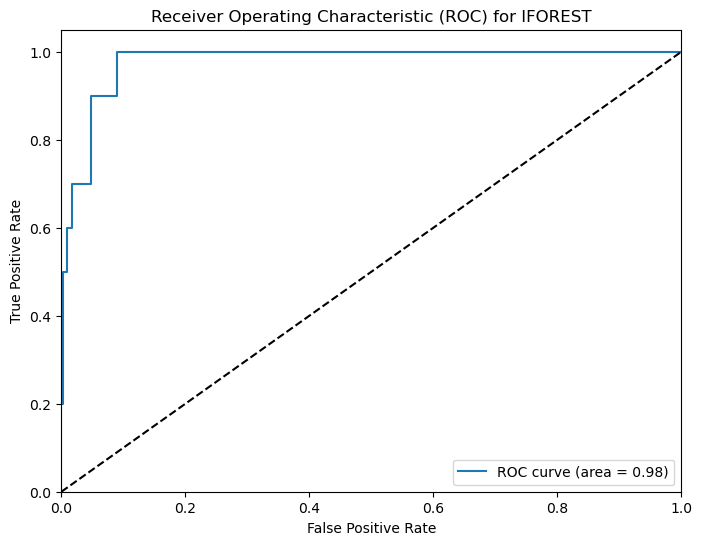

In [10]:
ifor_f1 = f1_score(y, iforest_pred)
print(f"F1-score: {ifor_f1:.2f}")

roc_auc = roc_auc_score(y, iforest_scores)
print(roc_auc)
ifor_fpr, ifor_tpr, _ = roc_curve(y, iforest_scores)

plt.figure(figsize=(8, 6))
plt.plot(ifor_fpr, ifor_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for IFOREST')
plt.legend(loc="lower right")
plt.show()